# Horses-Vs-Humans (55% Accurate)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/horses-or-humans-dataset/horse-or-human/train/humans/human15-01.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/train/humans/human04-24.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/train/humans/human03-09.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/train/humans/human13-29.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/train/humans/human04-08.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/train/humans/human05-26.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/train/humans/human01-06.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/train/humans/human14-00.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/train/humans/human03-28.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/train/humans/human15-09.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/train/humans/human08-03.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/train/humans/human09-19.png
/kaggle/input/ho

/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/train/horses/horse01-3.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/train/horses/horse49-0.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/train/horses/horse32-0.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/train/horses/horse22-3.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/train/horses/horse13-0.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/train/horses/horse07-0.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/train/horses/horse26-1.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/train/horses/horse49-2.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/train/horses/horse04-8.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/train/horses/horse02-3.png
/kaggle/input/horses-or-humans-dataset/h

/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/validation/horses/horse3-498.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/validation/horses/horse3-541.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/validation/horses/horse5-103.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/validation/horses/horse4-403.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/validation/horses/horse6-004.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/validation/horses/horse4-468.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/validation/horses/horse4-501.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/validation/horses/horse2-368.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/validation/horses/horse4-599.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/validation/ho

## Necessary Imports

In [2]:
import cv2
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

## Fetching Data

In [3]:
REV_LABELS = {0:'horses' , 1:'humans'}
LABELS = {'horses':0 ,'humans':1}
IMG_SIZE = 150
def get_data(folderpath):
    data = []
    for label in LABELS.keys():
        path = os.path.join(folderpath,label)
        class_num = LABELS[label]
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                img_arr = cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB)
                resized_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
                
    

In [4]:
train = get_data('/kaggle/input/horses-or-humans-dataset/horse-or-human/train')
validation = get_data('/kaggle/input/horses-or-humans-dataset/horse-or-human/validation')

In [5]:
print('train data :',train.shape)
print('validation data :',validation.shape)

train data : (1027, 2)
validation data : (256, 2)


## Preparing Data

In [6]:
train = shuffle(train)
validation = shuffle(validation)

x_train = []
y_train = []

x_val = []
y_val = []

for data in train:
    x_train.append(data[0])
    y_train.append(data[1])
    
for data in validation:
    x_val.append(data[0])
    y_val.append(data[1])

x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = x_train[:100]
y_test = y_train[:100]

x_train = x_train[100:]
y_train = y_train[100:]


print("X_TRAIN: ",x_train.shape)
print("Y_TRAIN: ",y_train.shape)
print("X_VAL: ",x_val.shape)
print("Y_VAL: ",y_val.shape)
print("X_TEST: ",x_test.shape)
print("Y_TEST: ",y_test.shape)



X_TRAIN:  (927, 150, 150, 3)
Y_TRAIN:  (927,)
X_VAL:  (256, 150, 150, 3)
Y_VAL:  (256,)
X_TEST:  (100, 150, 150, 3)
Y_TEST:  (100,)


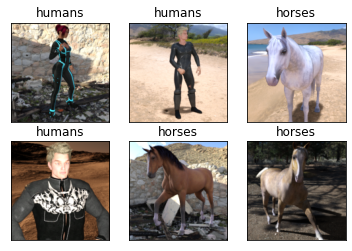

In [7]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i],aspect = 'auto')
    plt.title(REV_LABELS[y_train[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

## Data augmentation

In [8]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)

## Defining the Model

In [18]:
model = keras.models.Sequential(
    [
        keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Dropout(0.2),
        keras.layers.Conv2D(64,(3,3),activation = 'relu',input_shape = (150,150,3)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Dropout(0.2),
        keras.layers.Conv2D(128,(3,3),activation = 'relu',input_shape = (150,150,3)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Dropout(0.2),
        keras.layers.Flatten(),
        keras.layers.Dense(128,activation = 'relu'),
        keras.layers.Dense(1,activation = 'sigmoid')
    ]
)

model.compile(
    loss = 'binary_crossentropy',
    optimizer = keras.optimizers.RMSprop(lr = 10**(-4)),
    metrics = ['acc']
)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)      

In [20]:
epochs = 10
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),steps_per_epoch=len(x_train) / 32, epochs=epochs,validation_data=(x_val,y_val))


Epoch 1/10
29/28 [==============================] - 5s 175ms/step - loss: 0.7766 - acc: 0.5987 - val_loss: 89.9888 - val_acc: 0.5000
Epoch 2/10
29/28 [==============================] - 5s 181ms/step - loss: 0.5852 - acc: 0.6958 - val_loss: 95.3632 - val_acc: 0.5000
Epoch 3/10
29/28 [==============================] - 5s 162ms/step - loss: 0.5036 - acc: 0.7594 - val_loss: 70.0677 - val_acc: 0.5000
Epoch 4/10
29/28 [==============================] - 6s 199ms/step - loss: 0.4870 - acc: 0.7681 - val_loss: 85.7680 - val_acc: 0.5000
Epoch 5/10
29/28 [==============================] - 5s 167ms/step - loss: 0.4719 - acc: 0.7832 - val_loss: 98.4285 - val_acc: 0.5000
Epoch 6/10
29/28 [==============================] - 5s 176ms/step - loss: 0.4307 - acc: 0.8101 - val_loss: 97.7881 - val_acc: 0.5000
Epoch 7/10
29/28 [==============================] - 5s 165ms/step - loss: 0.3928 - acc: 0.8296 - val_loss: 52.9085 - val_acc: 0.5078
Epoch 8/10
29/28 [==============================] - 5s 176ms/step - l

In [12]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

## Plotting the loss

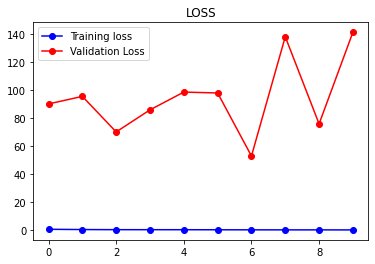

In [21]:
EPOCHS = [i for i in range(epochs)]

loss = history.history['loss']
acc = history.history['acc']


val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

plt.plot(EPOCHS,loss,'bo-',label="Training loss")
plt.plot(EPOCHS,val_loss,'ro-',label = "Validation Loss")
plt.title('LOSS')
plt.legend()

plt.show()

In [22]:
predictions = model.predict(x_test)

In [15]:
print(predictions)

[[1.3836664e-24]
 [1.0000000e+00]
 [1.4576714e-27]
 [0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.1604189e-22]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [8.3872569e-36]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [3.2183411e-07]
 [3.2001167e-18]
 [0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.4299149e-21]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+0

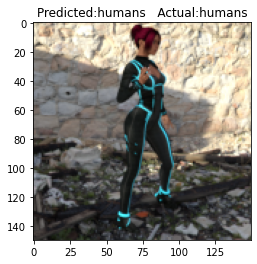

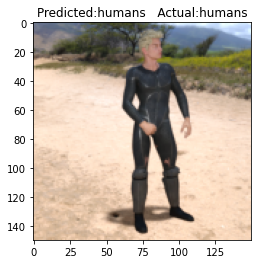

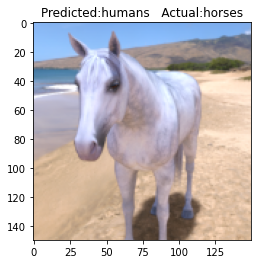

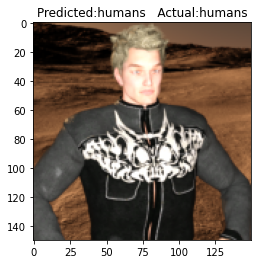

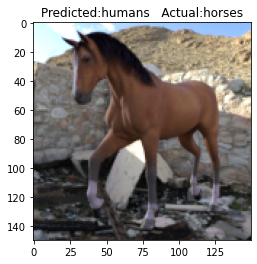

<Figure size 432x288 with 0 Axes>

In [23]:
for i in range(5):
    if(predictions[i] < 0.5):
        value = 0
    else:
        value = 1
    plt.imshow(x_train[i])
    plt.title('Predicted:'  + REV_LABELS[value] + '   Actual:' + REV_LABELS[y_train[i]])
    plt.figure()

## Accuracy

In [24]:
for i in range(len(predictions)):
    if(predictions[i] < 0.5):
        predictions[i] = 0
    else:
        predictions[i] = 1

count = 0
for i in range(len(predictions)):
    if(predictions[i] != y_train[i]):
        count += 1
        
print("Accuracy:",(count/len(predictions))*100)

Accuracy: 55.00000000000001
